In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\63999\AppData\Roaming\nltk_data...


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

sid = SentimentIntensityAnalyzer()

In [28]:
df = pd.read_csv('Dataset-SA.csv', sep = ',')

df['Summary'].head(15)

0     great cooler excellent air flow and for this p...
1                 best budget 2 fit cooler nice cooling
2     the quality is good but the power of air is de...
3                     very bad product its a only a fan
4                                         ok ok product
5     the cooler is really fantastic and provides go...
6                                     very good product
7                                             very nice
8                                       very bad cooler
9                                             very good
10    beautiful product good material and perfectly ...
11                                              awesome
12                                                 good
13                           wonderful product must buy
14           nice air cooler smart cool breeze producer
Name: Summary, dtype: object

In [29]:
df.drop(['Review'], axis = 1, inplace = True) 

In [30]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Summary', 'Sentiment'], dtype='object')

In [31]:
df.rename(columns={'Summary': 'Review'}, inplace=True)

df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Sentiment'], dtype='object')

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [5]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [32]:
df['Review']

0         great cooler excellent air flow and for this p...
1                     best budget 2 fit cooler nice cooling
2         the quality is good but the power of air is de...
3                         very bad product its a only a fan
4                                             ok ok product
                                ...                        
205047                                         good product
205048                                                 nice
205049                          very nice and fast delivery
205050                                      awesome product
205051    very good but mixing bowl not included is one ...
Name: Review, Length: 205052, dtype: object

In [33]:
b = df.iloc[0]['Review']
sid.polarity_scores(b)


{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'compound': 0.9576}

In [34]:
df.iloc[0]['Sentiment']

'positive'

In [40]:
df['Review'].isna().sum()

11

In [41]:
df.dropna(inplace = True)

In [42]:
df['Review'].isna().sum()

0

In [43]:
df['scores'] = df['Review'].apply(lambda Review: sid.polarity_scores(Review))
                                  
df.head()

,product_name,product_price,Rate,Review,Sentiment,scores
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,great cooler excellent air flow and for this p...,positive,"{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'comp..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,best budget 2 fit cooler nice cooling,positive,"{'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compou..."
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,the quality is good but the power of air is de...,positive,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp..."
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,very bad product its a only a fan,negative,"{'neg': 0.376, 'neu': 0.396, 'pos': 0.228, 'co..."
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,ok ok product,neutral,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp..."


In [44]:
df['compound'] = df['scores'].apply(lambda scores_dict: scores_dict['compound'])

df.head()

,product_name,product_price,Rate,Review,Sentiment,scores,compound
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,great cooler excellent air flow and for this p...,positive,"{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'comp...",0.9576
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,best budget 2 fit cooler nice cooling,positive,"{'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compou...",0.8591
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,the quality is good but the power of air is de...,positive,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.2382
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,very bad product its a only a fan,negative,"{'neg': 0.376, 'neu': 0.396, 'pos': 0.228, 'co...",-0.3597
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,ok ok product,neutral,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",0.5267


df.rename(columns={'Sentiment': 'SentimentFromDataSet'}, inplace=True)

df.columns

**Based on what I researched, compound scores between -0.05 and 0.05 are considered neutral which is applied in this code.**

In [57]:
df['C_score'] = df['compound'].apply(lambda c: 'positive' if c > 0.05 else 'negative' if c < -0.05 else 'neutral')

df.head()

,product_name,product_price,Rate,Review,SentimentFromDataSet,scores,compound,C_score
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,great cooler excellent air flow and for this p...,positive,"{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'comp...",0.9576,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,best budget 2 fit cooler nice cooling,positive,"{'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compou...",0.8591,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,the quality is good but the power of air is de...,positive,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.2382,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,very bad product its a only a fan,negative,"{'neg': 0.376, 'neu': 0.396, 'pos': 0.228, 'co...",-0.3597,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,ok ok product,neutral,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",0.5267,positive


In [58]:
df['C_score'].value_counts()

positive    162802
negative     23704
neutral      18535
Name: C_score, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(df['SentimentFromDataSet'], df['C_score'])

0.9032876351558956

In [60]:
print(classification_report(df['SentimentFromDataSet'], df['C_score']))

              precision    recall  f1-score   support

    negative       0.95      0.80      0.87     28232
     neutral       0.29      0.52      0.37     10234
    positive       0.97      0.95      0.96    166575

    accuracy                           0.90    205041
   macro avg       0.73      0.75      0.73    205041
weighted avg       0.93      0.90      0.91    205041



In [52]:
pip install scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


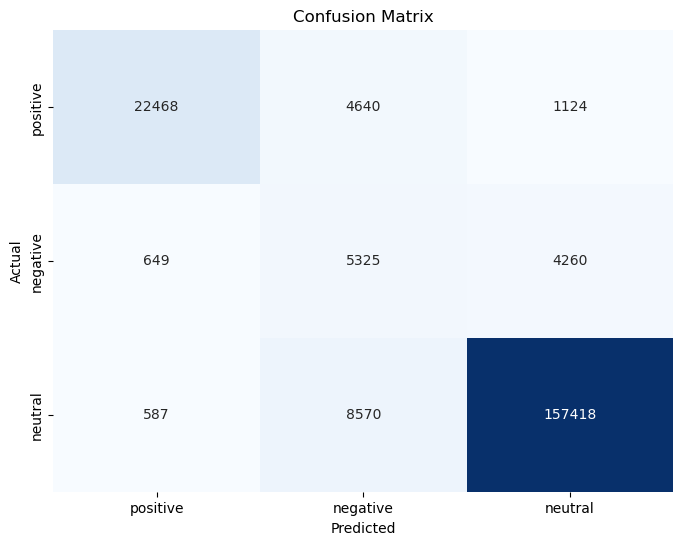

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(df['SentimentFromDataSet'], df['C_score'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=df['C_score'].unique(), yticklabels=df['C_score'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
total_data = 205041

positive_percentage = (162802 / 205041)
negative_percentage = (23704 / 205041)
neutral_percentage = (18535 / 205041)

print(positive_percentage)
print(negative_percentage)
print(neutral_percentage)

0.7939972981013553
0.11560614706327027
0.09039655483537438


**Conclusion and Findings**

* There is a significant number of 'positive' predictions (162,802), indicating that the model frequently predicts 'positive' sentiments.

* There are fewer 'negative' predictions (23,704) and 'neutral' predictions (18,535).

* The accuracy score of the actual sentiment and our predicted sentiment through the model is 0.90, which translates to 90% accuracy.

**Here's a breakdown of precision, recall, and F1-score for each sentiment class:**

* For 'negative': Precision = 0.95, Recall = 0.80, F1-score = 0.87, Support = 28,232.
* For 'neutral': Precision = 0.29, Recall = 0.52, F1-score = 0.37, Support = 10,234.
* For 'positive': Precision = 0.97, Recall = 0.95, F1-score = 0.96, Support = 166,575.

Based on these findings, we can conclude that 79% of people have provided positive feedback about the products. In contrast, 11% have expressed negative feedback, while only 0.09% have a neutral sentiment regarding the products.